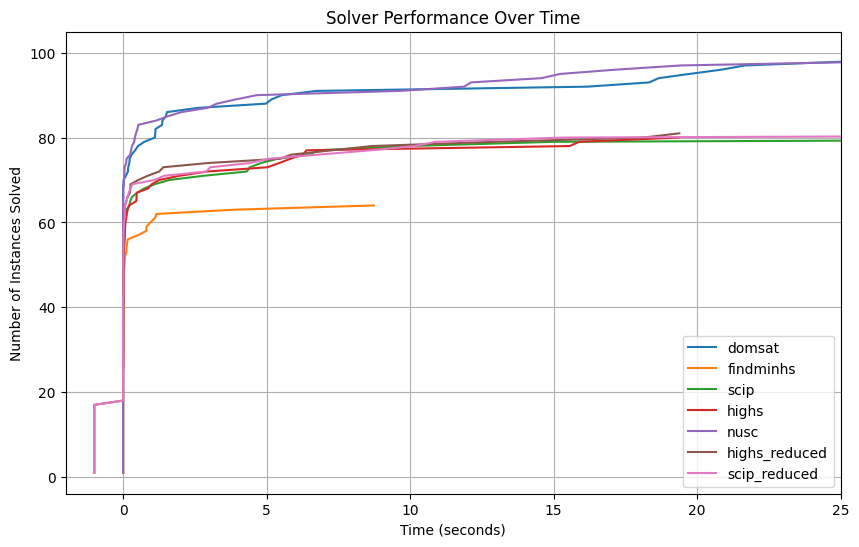

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

def process_solver_data(file_path):
    """Reads and processes a single solver's CSV file."""
    df = pd.read_csv(file_path)
    df = df.sort_values(by="Time Taken (seconds)")  # Sort by time
    df["Solved Instances"] = range(1, len(df) + 1)  # Cumulative count
    return df

def plot_solvers_data(folder_path):
    """Reads multiple solver CSV files and plots cumulative solved instances."""
    plt.figure(figsize=(10, 6))
    
    for file in glob.glob(f"{folder_path}/*.csv"):  # Read all CSVs in folder
        if "properties" in file or "reductions" in file or "lp" in file or "merged_output" in file:
            continue
        solver_name = file.split("/")[-1].replace(".csv", "")  # Extract solver name
        df = process_solver_data(file)
        plt.plot(df["Time Taken (seconds)"], df["Solved Instances"], label=solver_name)

    plt.xlabel("Time (seconds)")
    plt.ylabel("Number of Instances Solved")
    plt.title("Solver Performance Over Time")
    plt.xlim(-2,25)
    plt.legend()
    plt.grid()
    plt.show()

# Example usage: Change "data" to your actual folder containing CSV files.
plot_solvers_data("graphs/exact-private")
